# **Flight Price Analysis**

In [2]:
# Import The required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
#import hvplot.pandas

# Import API key
#from api_keys import geoapify_key

# **Dataset dataframe**

In [3]:
#Create airport dataframe
flight_df = pd.read_csv('Resources/Clean_Dataset.csv')

#Display sample Data
flight_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price_INR,price_USD
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,71.44
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,71.44
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,71.47
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,71.46
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,71.46


# **Analysis on different Airlines and Price**

In [13]:
# Finding out Average airfare for each Airlines. 
average_fare = flight_df.groupby("airline")["price_USD"].mean()
average_fare

airline
AirAsia       49.093511
Air_India    282.084698
GO_FIRST      67.823707
Indigo        63.890978
SpiceJet      74.151627
Vistara      364.758322
Name: price_USD, dtype: float64

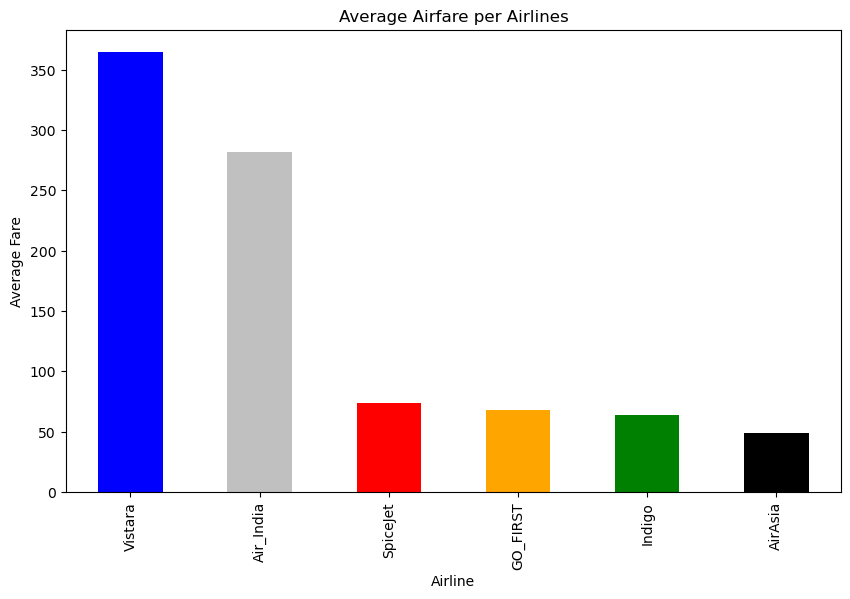

In [5]:
# Plotting each Airlines airfare average

average_fare_sorted = average_fare.sort_values(ascending=False)
colors = ['blue', 'silver', 'red', 'orange', 'green', 'black']
average_fare_sorted.plot(kind="bar", figsize=(10, 6), color=colors)

plt.title("Average Airfare per Airlines")
plt.xlabel("Airline Name")
plt.ylabel("Average Fare")
plt.show()

In [7]:
#Finding Airline average fare is the Highest and lowest

highest_average_fare = average_fare.idxmax()
highest_average_price = average_fare[highest_average_fare]
lowest_average_fare = average_fare.idxmin()
lowest_average_price = average_fare[lowest_average_fare]

high_low_plot = average_fare.loc[[highest_average_fare, lowest_average_fare]].reset_index()
high_low_plot

,airline,price_USD
0,Vistara,364.758322
1,AirAsia,49.093511


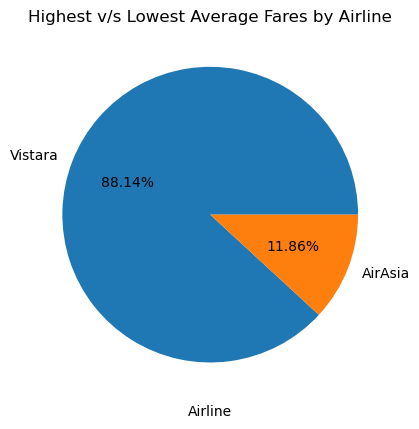

The airline company with the highest average fare: Vistara ($364.76)
The airline company with the lowest average fare: AirAsia ($49.09)


In [9]:
# Plotting Highest and lowest Average airfare
plt.pie(high_low_plot['price_USD'], labels=high_low_plot['airline'], autopct='%1.2f%%')
plt.xlabel('Airline')
plt.title('Highest v/s Lowest Average Fares by Airline')
plt.show()

print(f"The airline company with the highest average fare: {highest_average_fare} (${highest_average_price:.2f})")
print(f"The airline company with the lowest average fare: {lowest_average_fare} (${lowest_average_price:.2f})")

In [13]:
#map of the airline destination

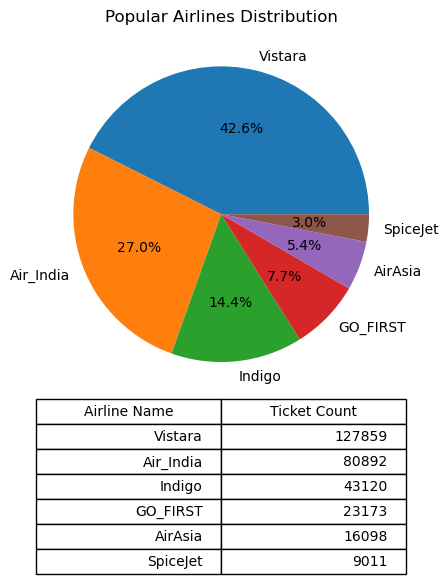

In [11]:
# Finding out which Airline was most popular Airline in purchasing tickets. 
popular_airline = flight_df['airline'].value_counts()
plt.pie(popular_airline, labels=popular_airline.index, autopct='%1.1f%%')
plt.title('Popular Airlines Distribution')


table_data = popular_airline.reset_index()
table_data.columns = ['Airline Name', 'Ticket Count']
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.show()

In [12]:
# statistics for the airline vs 'price' column

price_stats = flight_df.groupby("airline")['price_USD']
price_df = pd.DataFrame({
    'Mean Price': price_stats.mean(),
    'Median Price':price_stats.median(),
    'Price Variance': price_stats.var(),
    'Price Std. Dev.': price_stats.std(),
    'Price SEM': price_stats.sem()

})

# Formatting
price_df["Mean Price"] = price_df["Mean Price"].map("${:,.2f}".format)
price_df["Median Price"] = price_df["Median Price"].map("${:,.2f}".format)
price_df["Price Variance"] = price_df["Price Variance"].map("${:,.2f}".format)
price_df["Price Std. Dev."] = price_df["Price Std. Dev."].map("${:,.2f}".format)
price_df["Price SEM"] = price_df["Price SEM"].map("${:,.2f}".format)

# Print the calculated statistics for price
print("Pricing Statistics by Airline")
price_df

Pricing Statistics by Airline


,Mean Price,Median Price,Price Variance,Price Std. Dev.,Price SEM
airline,,,,,
AirAsia,$49.09,$39.31,"$1,148.44",$33.89,$0.27
Air_India,$282.08,$138.24,"$62,931.49",$250.86,$0.88
GO_FIRST,$67.82,$64.03,$910.02,$30.17,$0.20
Indigo,$63.89,$53.44,"$1,538.73",$39.23,$0.19
SpiceJet,$74.15,$67.85,"$1,295.70",$36.00,$0.38
Vistara,$364.76,$186.52,"$94,646.13",$307.65,$0.86


# **Analysis on purchasing tickets before Days left to travel and Price**

In [14]:
# Finding out average price for tickets purchase base on days left
average_price_per_day = flight_df.groupby('days_left')['price_USD'].mean()
#print(average_price_per_day)

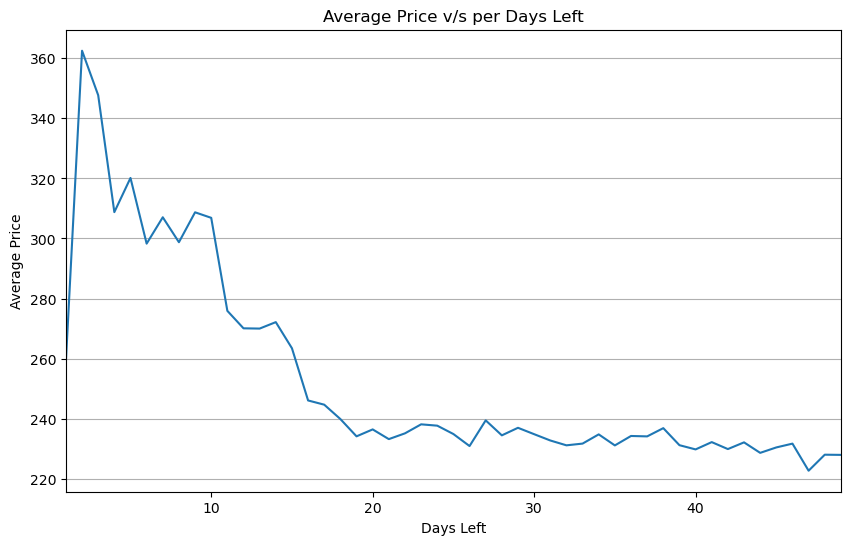

In [15]:
# Plotting Average price based on days left.
average_price_per_day.plot(kind='line', figsize =(10,6))
plt.title("Average Price v/s per Days Left")
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.xlim(left=1,right=49)
plt.grid(axis='y')
plt.show()

The r-value is: -0.09
y = -1.85x + 298.70


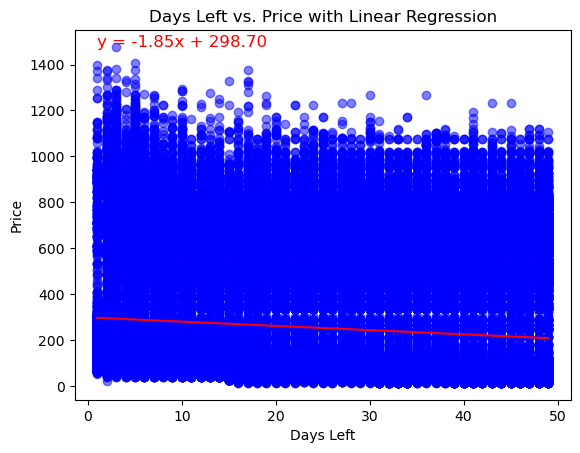

In [16]:
# Linear Regression on Days left and Price 
x = flight_df['days_left']
y = flight_df['price_USD']
plt.scatter(x, y, color='blue', alpha=0.5)

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
equation = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(x, line, color='red')
plt.title('Days Left vs. Price with Linear Regression')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.text(x.min(), y.max(), equation, fontsize=12, color='red')

print(f"The r-value is: {r_value:.2f}")
print(equation)

plt.show()

# **Statistics on Days left and Price**

In [18]:
# statistics for the Days_left vs Price column

days_stats = flight_df.groupby("days_left")['price_USD']
days_price_df = pd.DataFrame({

'Mean Days left': days_stats.mean(),
'Median Days left':days_stats.median(),
'Days left Variance': days_stats.var(),
'Days left Std. Dev.': days_stats.std(),
'Days left SEM': days_stats.sem()

})
# Formatting
days_price_df["Mean Days left"] = days_price_df["Mean Days left"].map("${:,.2f}".format)
days_price_df["Median Days left"] = days_price_df["Median Days left"].map("${:,.2f}".format)
days_price_df["Days left Variance"] = days_price_df["Days left Variance"].map("${:,.2f}".format)
days_price_df["Days left Std. Dev."] = days_price_df["Days left Std. Dev."].map("${:,.2f}".format)
days_price_df["Days left SEM"] = days_price_df["Days left SEM"].map("${:,.2f}".format)

# Print the calculated statistics for price
print("Price Statistics by Days_left")
days_price_df

Price Statistics by Days_left


,Mean Days left,Median Days left,Days left Variance,Days left Std. Dev.,Days left SEM
days_left,,,,,
1,$259.10,$181.96,"$53,555.36",$231.42,$5.27
2,$362.54,$216.21,"$85,878.76",$293.05,$4.62
3,$347.71,$196.00,"$87,292.56",$295.45,$4.53
4,$308.77,$156.65,"$76,975.60",$277.44,$3.89
5,$320.16,$156.65,"$82,961.79",$288.03,$3.92
6,$298.28,$149.01,"$70,974.44",$266.41,$3.52
7,$307.06,$155.88,"$74,640.41",$273.20,$3.62
8,$298.75,$151.90,"$67,881.77",$260.54,$3.43
9,$308.72,$167.36,"$66,774.28",$258.41,$3.43
